## Attempt with Plotly - World Map using Total Years in War

In [3]:
import plotly
import numpy as np
import pandas as pd

In [2]:
plotly.offline.init_notebook_mode(connected=True)

In [235]:
# Set folder name
file_path = '../pandas_dfs/'

# Set filenames
years_in_war_file = 'years_per_country.csv'

# Read the files
total_years = pd.read_csv(file_path + years_in_war_file, encoding='latin-1')

In [236]:
total_years.head()

,country,years
0,Mali,1
1,South Ossetia,1
2,South Korea,1
3,Slovenia,1
4,Burkina Faso,1


In [237]:
data = [dict(type='choropleth',
             locations = total_years['country'].astype(str),
             z=total_years['years'].astype(float),
             colorscale = 'Reds',
             locationmode='country names')]

In [238]:
layout = dict(geo=dict(scope='world',
              projection={'type': 'equirectangular'},
                      showframe=False))

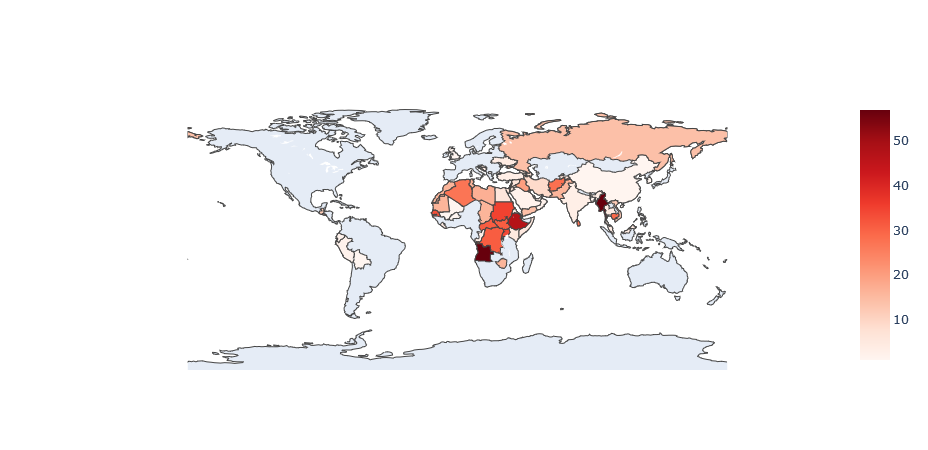

In [239]:
fig = dict(data=data, layout=layout)
# Need to add title
plotly.offline.iplot(fig)

## Attempt with crop production over years

In [79]:
# Set folder name
file_path = '../pandas_dfs/'

# Set filenames
merged_data_file = 'merged_data.csv'
country_codes_file = 'plotly_countries_and_codes.csv'

# Read the files
merged_data = pd.read_csv(file_path + merged_data_file, encoding='latin-1')
country_codes = pd.read_csv(file_path + country_codes_file, encoding='latin-1')

In [66]:
merged_data.head()

,country,year,value_crop,value_livestock,value_population,value_land_area
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0


In [83]:
country_codes = country_codes.rename(columns={
        'COUNTRY': 'country'})
country_codes.head()

,country,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [100]:
#Add country codes to merged_data

merged_data_df = pd.merge(merged_data,country_codes[['country','CODE']],on='country', how='left')
merged_data_df.head()

,country,year,value_crop,value_livestock,value_population,value_land_area,CODE
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0,AFG
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0,AFG
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0,AFG
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0,AFG
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0,AFG


In [104]:
# Make new column with year only

merged_data_df['year_only'] = pd.DatetimeIndex(merged_data_df['year']).year
merged_data_df.head()

,country,year,value_crop,value_livestock,value_population,value_land_area,CODE,year_only
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0,AFG,1961
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0,AFG,1962
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0,AFG,1963
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0,AFG,1964
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0,AFG,1965


In [97]:
merged_data_df.dtypes

country              object
year                 object
value_crop          float64
value_livestock     float64
value_population    float64
value_land_area     float64
CODE                 object
dtype: object

In [129]:
z=merged_data.loc[merged_data['year_only'] == 1961]['value_crop'].reset_index(drop=True)
z

Series([], Name: value_crop, dtype: float64)

In [223]:
data2 = [dict(type='choropleth',
             locations = merged_data_df.loc[merged_data_df['year_only'] == 1961]['country'].reset_index(drop=True).astype(str),
             z=merged_data_df.loc[merged_data_df['year_only'] == 1961]['value_crop'].reset_index(drop=True).astype(float),
             colorscale = 'Blues',
             locationmode='country names')]

In [224]:
year = 1961
# Used a small range because it gets slow with a lot of them
for i in range(5):
    dict_temp = [dict(type='choropleth',
             locations = merged_data_df.loc[merged_data_df['year_only'] == (year +i)]['country'].reset_index(drop=True).astype(str),
             z=merged_data_df.loc[merged_data_df['year_only'] == (year + i)]['value_crop'].reset_index(drop=True).astype(float),
             colorscale = 'Blues',
             locationmode='country names')]
    data2.append(dict_temp[0].copy())
   # data[-1]['z'] = data[0]['z'] 

In [225]:
# let's create the steps for the slider
steps = []
for i in range(5):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i + 1961))
    step['args'][1][i] = True
    steps.append(step)

In [230]:
sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]    
layout2 = dict(geo=dict(scope='world',
              projection={'type': 'equirectangular'},
              showframe=False),
              sliders=sliders)


#list of projection types https://stackoverflow.com/questions/32041078/plotly-map-projection-types

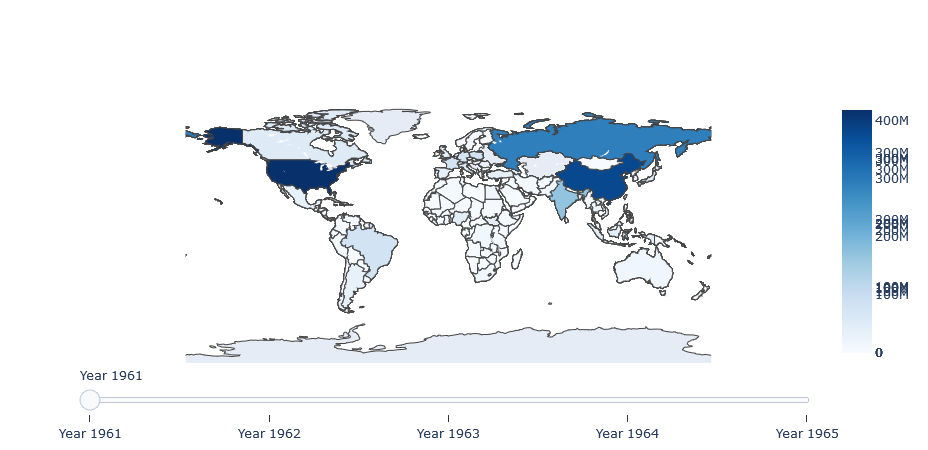

In [232]:
fig2 = dict(data=data2, layout=layout2)
# Need to add title
plotly.offline.iplot(fig2)

In [ ]:
#Really cool 3D map!! Also absolutely useless in this case :P

sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]    
layout3 = dict(geo=dict(scope='world',
              showocean = True,
              projection={'type': "orthographic"},
              oceancolor = 'rgb(255, 192, 203)'),
              sliders=sliders)

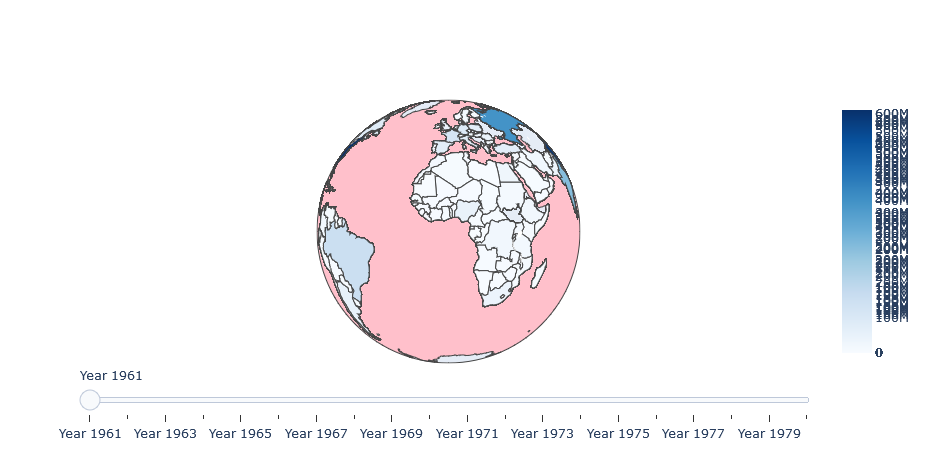

In [179]:
fig3 = dict(data=data2, 
           layout=layout3)

plotly.offline.iplot(fig3)